## Pandas 
- Analyse 2D or multi dimensional data
- Table like data 
- Internally they use numpy

In [5]:
%pip install pandas


  Using cached pandas-2.2.1.tar.gz (4.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      + meson setup C:\Users\E1005238\AppData\Local\Temp\pip-install-1gyuezd1\pandas_6483391ea07e4fc5b40be004f77c8ebe C:\Users\E1005238\AppData\Local\Temp\pip-install-1gyuezd1\pandas_6483391ea07e4fc5b40be004f77c8ebe\.mesonpy-p3t9k52i\build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --vsenv --native-file=C:\Users\E1005238\AppData\Local\Temp\pip-install-1gyuezd1\pandas_6483391ea07e4fc5b40be004f77c8ebe\.mesonpy-p3t9k52i\build\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.1
      Source dir: C:\Users\E1005238\AppData\Local\Temp\pip-install-1gyuezd1\pandas_6483391ea07e4fc5b40be004f77c8ebe
      Build dir: C:\Users\E1005238\AppData\Local\Temp\pip-install-1gyuezd1\pandas_6483391ea07e4fc5b40be004f77c8ebe\.mesonpy-p3t9k52i\build
      Build type: native build
      Project name: pandas
      Project vers

## Creating data
- Dictionaries 
- Import from csv

In [10]:
import pandas as pd

In [ ]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 34, 29, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}

df = pd.Dataframe(data)
type(df)
df

In [ ]:
df.head(2) # filtering rows

## info 
feel for the data

In [ ]:
df.info()

In [ ]:
df.shape # (4,3) number of rows and columns
df.dtypes # datatypes
df.describe() # numeric
df.describe(include="all") # numeric and non numeric values

In [12]:
tips_df = pd.read_csv('./tips.csv')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips_df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [ ]:
tips_df[['day','time','tip']].head(5) # multiple colmns 

In [ ]:
tips_df[['tip', 'size']].head(5)
tips_df['tips_per_person'] = (tips_df['tip'] / tips_df['size']) # adding new column
tips_df.head(5) 
tips_df.tail(10)

## task: find how much percentage people are tipping
- percentage
- add it as another column: tip_percent
- round off to 2 decimal places

In [40]:
tips_df = pd.read_csv('tips.csv')
tips_df['tip_percent'] = round(((tips_df['tip'] / tips_df['total_bill']) * 100),2)
tips_df

tips_df.sort_values(by='total_bill')
tips_df.sort_values(by='tip', ascending=False)
tips_df.sort_values(by="tip_percent", ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05


### filter the rows where people dined on a sunday
- clue is to use boolean matrix

In [29]:
sunday_diners = tips_df[tips_df['day'] == 'Sun']
sunday_diners

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,16.75
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.57
188,18.15,3.50,Female,Yes,Sun,Dinner,3,19.28
189,23.10,4.00,Male,Yes,Sun,Dinner,3,17.32


### get the rows where person have tipped more than R10 and on a wednesday

In [43]:
tips_df = pd.read_csv('tips.csv')
fri3 = tips_df[(tips_df['tip'] > 3) & (tips_df['day'] == 'Fri')]
fri3

,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2


### task 3: extended task 2 top 5 tips on that Friday

In [44]:
fri3_sorted = fri3.sort_values(by='tip', ascending=False) # asc or desc direction
top5_fri_tips = fri3_sorted.head(5)
top5_fri_tips

,total_bill,tip,sex,smoker,day,time,size
95,40.17,4.73,Male,Yes,Fri,Dinner,4
93,16.32,4.30,Female,Yes,Fri,Dinner,2
96,27.28,4.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2


In [45]:
# Task 2 done by Ragav
print((tips_df['tip']>3).value_counts())
tips_gt_3 = tips_df[tips_df['tip']>3]

print((tips_df['day']=='Fri').value_counts())
tips_gt_3[tips_gt_3['tip']>3]

# & and 
# | or

# Binary operation
tips_df[(tips_gt_3['day']=='Fri') & (tips_df['tip']>3)]


tip
False    146
True      98
Name: count, dtype: int64
day
False    225
True      19
Name: count, dtype: int64


,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2


### task 4: rows where - large parties: people are 5 or more or they spend R35 or more

In [ ]:
tips_df = pd.read_csv('tips.csv')
large_parties = tips_df[(tips_df['total_bill'] >= 35) | (tips_df['size'] >= 5)]
large_parties


In [ ]:
# dot syntax or box syntax
tips_df['size'] # size attribute all df or space in the column name
tips_df.smoker

tips_df[(tips_df['size']>5) | (tips_df['total_bill']>35)]

### Data Exploration

### Summarization 

- filter rows, columns
- head, tail - limit
- sort values
- conditionals with operators

### Slicing
- loc
- iloc - index

In [54]:
tips_df.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [58]:
tips_df.iloc[3]
tips_df.iloc[3:5]

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
tips_df.loc[3]
tips_df.loc[3:5] # locating for index 3, 4 and 6

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [ ]:
tips_df.tail(6).loc[1] # error
tips_df.tail(6).loc[239:241] # match the value not the row position
tips_df.tail(6)
tips_df.tail(60).iloc[2:4] # matches row position
tips_df.tail(6).iloc[2:4].loc[:,'tip':'day']

In [67]:
tips_df.tail(6).loc[239:241, 'tip']
tips_df.tail(6).loc[239:241, ['tip','size']]
tips_df.tail(6).loc[239:241, 'tip':'day']

,tip,sex,smoker,day
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat


In [92]:
tips_df.tail(6).iloc[2:4, 1:5] # range with index
tips_df.tail(6).iloc[2:4].loc[:, 'tip':'day']


,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


### task: find the rows with highest tip_percent. skip the first 5 on a weekend (sat & sun)

In [102]:
weekends = tips_df[tips_df['day'].isin(['Sun', 'Sat'])].sort_values(by='tip_percent', ascending=False).iloc[5:]
weekends

,total_bill,tip,sex,smoker,day,time,size,tip_percent
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.95
51,10.29,2.60,Female,No,Sun,Dinner,2,25.27
181,23.33,5.65,Male,Yes,Sun,Dinner,2,24.22
185,20.69,5.00,Male,No,Sun,Dinner,5,24.17
174,16.82,4.00,Male,Yes,Sun,Dinner,2,23.78
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.64


### task 2: final result should include only tip_percent, day, tip, total_bill

In [100]:
final_result = weekends[['tip_percent', 'day', 'tip', 'total_bill']]
final_result

,tip_percent,day,tip,total_bill
109,27.95,Sat,4.00,14.31
51,25.27,Sun,2.60,10.29
181,24.22,Sun,5.65,23.33
185,24.17,Sun,5.00,20.69
174,23.78,Sun,4.00,16.82
...,...,...,...,...
187,6.57,Sun,2.00,30.46
0,5.94,Sun,1.01,16.99
57,5.68,Sat,1.50,26.41
102,5.64,Sat,2.50,44.30


### statistics 
- mean
- median
- sum

In [106]:
tips_df['tip'].mean()
tips_df['tip'].median()
tips_df['tip'].sum()
tips_df['tip'].mode()

tips_df[['total_bill','tip']].mean()
tips_df[['total_bill','tip']].median()
tips_df[['total_bill','tip']].sum()
tips_df[['total_bill','tip']].mode()
tips_df[['total_bill','tip']].max()
tips_df[['total_bill','tip']].min()

total_bill    3.07
tip           1.00
dtype: float64

### Summarizing
- Bread and butter

### Task: average total_bill on each day
SELECT day, AVG(total_bill) AS avg_total_bill
FROM tips
GROUP BY day;

In [107]:
tips_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

SELECT smoker,
       SUM(tip) AS total_tip
FROM tips
GROUP BY smoker;

SELECT smoker,
       AVG(tip) AS average_tip
FROM tips
GROUP BY smoker;

In [112]:
tips_df.groupby('smoker')['tip'].sum()
tips_df.groupby('smoker')['tip'].mean()
tips_df.groupby('smoker').aggregate({'tip':['sum', 'mean'],'total_bill':'mean'})

tip           total_bill
           sum      mean       mean
smoker                             
No      451.77  2.991854  19.188278
Yes     279.81  3.008710  20.756344

### task 3: based on the day, total of total bill and on avg what is the tip percentage

In [120]:
tips_df.groupby('day').aggregate({'total_bill':'sum','tip':'mean'})
tips_df.groupby(['smoker', 'day'])['tip'].mean()
tips_df.groupby(['day', 'smoker'])['tip'].mean() # order matters


day   smoker
Fri   No        2.812500
      Yes       2.714000
Sat   No        3.102889
      Yes       2.875476
Sun   No        3.167895
      Yes       3.516842
Thur  No        2.673778
      Yes       3.030000
Name: tip, dtype: float64

In [124]:
### Task: on an average who (male or female) earns more tip each day
tips_df.groupby(['day', 'sex'])['tip'].mean().unstack() 
# tips_df.groupby(['day', 'sex'])['tip'].mean() # order matters


sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


### Unstack
- Transform the result more easier to analyse (It pulls out the aggregate columns into seperate columns - more readable)

In [ ]:
### Task 2: on an average, max, min, who (male or female) earns more tip each day
tips_df.groupby(['day', 'sex'])['tip'].aggregate({'tip':['mean', 'max', 'min']}).unstack()

In [14]:
pd.pivot_table(tips_df, index="day", columns="smoker", values="tip", aggfunc="sum")

smoker,No,Yes
day,,
Fri,11.25,40.71
Sat,139.63,120.77
Sun,180.57,66.82
Thur,120.32,51.51


### Visualise
- Matplot
    - Pioneer
    - Beginner-friendly
- Seaborn
    - It uses internally matplot
    - Complex visualization easily

In [15]:
%pip install matplotlib

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:--:--
     ---------------- -------------------- 71.7/162.3 kB 975.2 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 162.3/162.3 kB 968.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 2.0 MB/s eta 0:00:04
    --------------------------------------- 0.2/7.6 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.6 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/7.6 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.6 MB 1.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/7.6 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.6 MB 2.0 MB/s eta 0:00:04
   --- -----

In [16]:
%pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 35.4 k

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

### Bar Graph
- Average total bill by day

<Axes: title={'center': 'Propotion of meals'}, ylabel='count'>

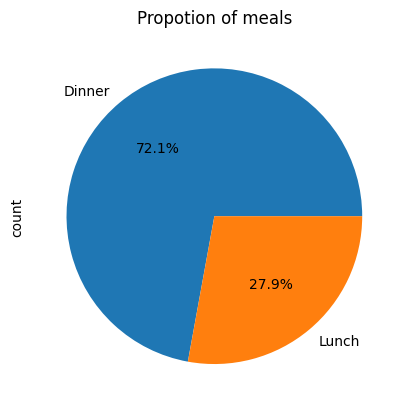

In [34]:
# x-axis day y-axis avg
# y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()
# x_days = y_avg_total_bill.index
# plt.bar(x_days, y_avg_total_bill, color="crimson", alpha=0.2)
# plt.xlabel("Days")
# plt.ylabel("Average sales in R")
# plt.title("Average sales in the week ")

# series
# y_avg_total_bill.plot(kind="bar", xlabel="Days", ylabel="Average sales in the week", color="Crimson", alpha=0.2)
# y_avg_total_bill.plot(kind="pie", autopct='%1.1f%%', title="Average sales in the week")

### Task: Create a pie chart comparing how many times people on time of the time of the day (Dinner, Lunch)
y_axis = tips_df['time'].value_counts()
x_axis = y_axis.index
y_axis.plot(kind="pie", autopct='%1.1f%%', title="Propotion of meals")

Text(0.5, 1.0, 'Tip')

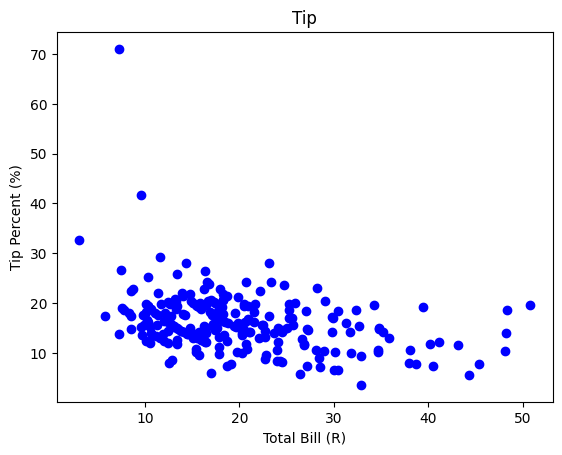

In [41]:
# x-axis -> total_bill , y-axis -> tip_percent
# y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()
# x_days = y_avg_total_bill.index
plt.scatter(tips_df['total_bill'], tips_df['tip_percent'], color="blue")
plt.xlabel("Total Bill (R)") 
plt.ylabel("Tip Percent (%)")
plt.title("Tip")

Text(0, 0.5, 'Frequency')

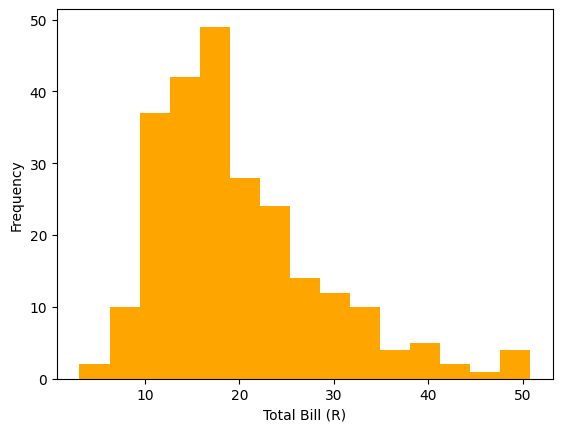

In [38]:
plt.hist(tips_df['total_bill'], color="orange", bins=15)
plt.xlabel('Total Bill (R)')
plt.ylabel('Frequency')

C:\Users\E1005238\AppData\Local\Temp\ipykernel_21428\1158329781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips_df, palette="pastel")


Text(0.5, 1.0, 'Average sales in the week')

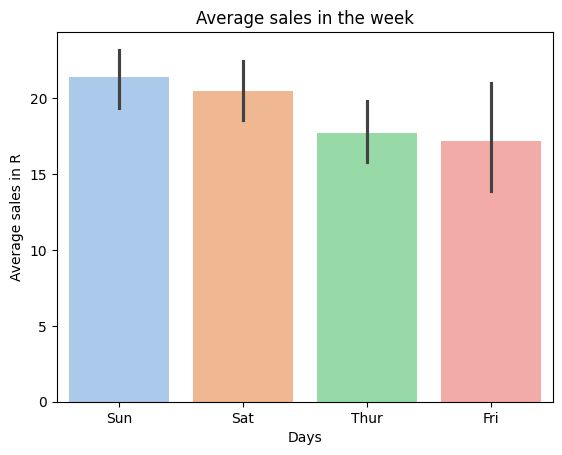

In [44]:
# Seaborn
# x -> day , y -> total_bill

# Average total_bill vs each day
sns.barplot(x='day', y='total_bill', data=tips_df, palette="pastel")
plt.xlabel("Days")
plt.ylabel("Average sales in R")
plt.title("Average sales in the week")

Text(0, 0.5, 'Tips(%)')

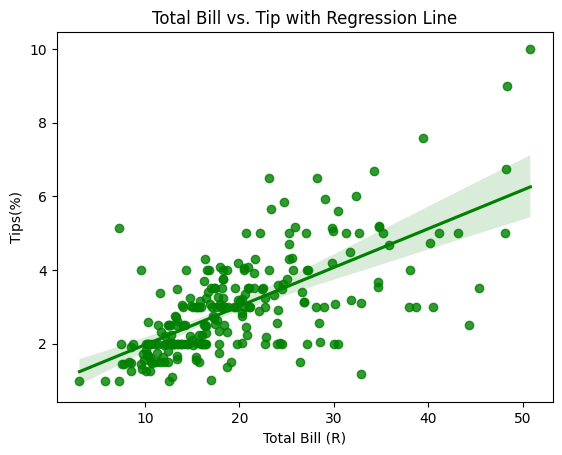

In [45]:
sns.regplot(x='total_bill', y='tip', data=tips_df, color="green")
plt.title('Total Bill vs. Tip with Regression Line')
plt.xlabel('Total Bill (R)')
plt.ylabel('Tips(%)')